## Steps in EDA:
- Data Loading
- Data Sanity Checks - shape/info etc etc
- Data Understanding and Problem Statement Understanding
- Missing Value Check
- Segmentation (Optional)

## Importing Necessary Library

In [1]:
import pandas as pd
import numpy as np

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Purpose to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [3]:
df=pd.read_csv("day.csv")# r'C/Users/Downloads/day.csv'
#https://drive.google.com/file/d/1WgDNC-uiVIlVDVoLWOmJgBocIN3v3ILs/view?usp=drive_link

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Missing Values Check

In [6]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [ ]:
# https://cdn.upgrad.com/uploads/production/0fdfa494-a9bf-4b32-873f-900e3b262948/Readme.txt

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Problem Statement: Need to identify the factors affecting the bike's demand

In [9]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
num_cols=["temp","atemp","hum","windspeed","casual","registered","cnt"]
# on which i wont be doing the analysis
extra_cols=["instant","dteday"]
len(cat_cols)+len(num_cols)+len(extra_cols)

16

## EDA --> Exploratory Data Analysis

In [ ]:
## Univariate Analysis --> Analysis with Single variable
--> Mean, Median, Max, Min, Std, Variance, Count
--> Distribution (Histogram,Countplot,boxplot)
## Bivaraite Analsyis --> Analysis with two variables
--> Relationship between two variables (Scatterplot, boxplot,barplot etc)
## Multivariate Analysis
--> Relationship between more than variables (Heatmap etc)

## Univariate Analysis

### Numerical Columns

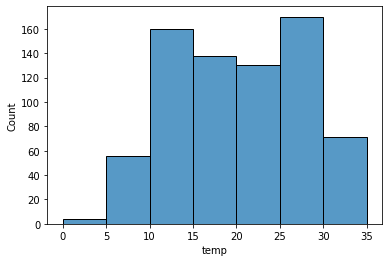

In [14]:
sns.histplot(x=df["temp"],bins=range(0,40,5))
plt.show()

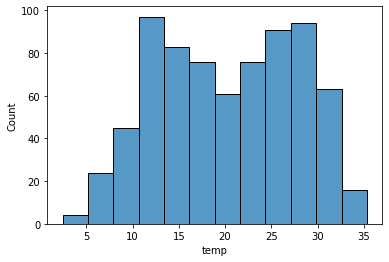

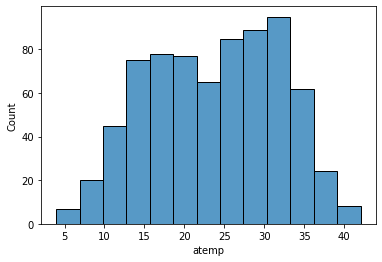

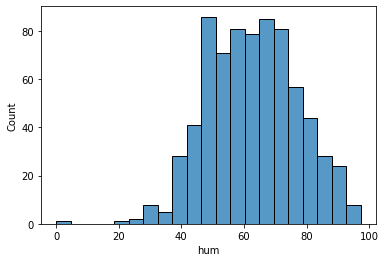

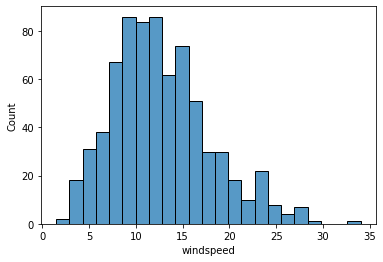

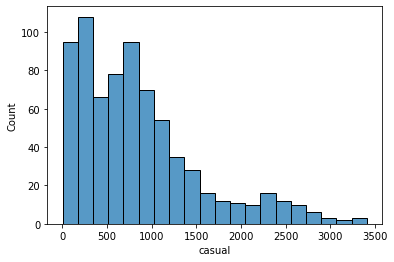

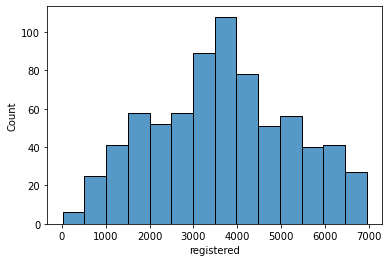

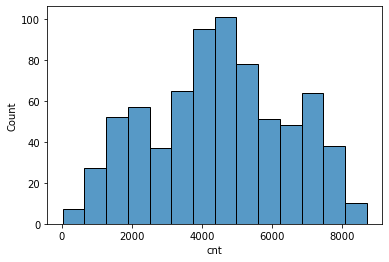

In [15]:
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()

In [19]:
df["temp"].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

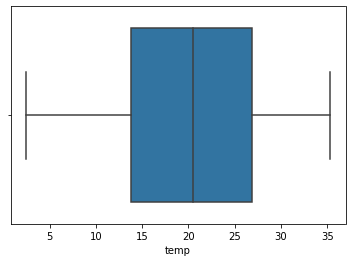

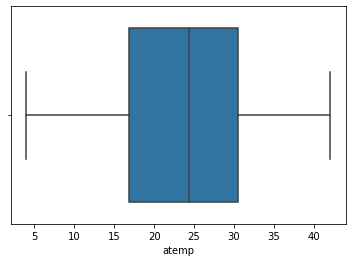

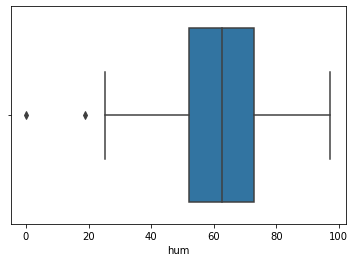

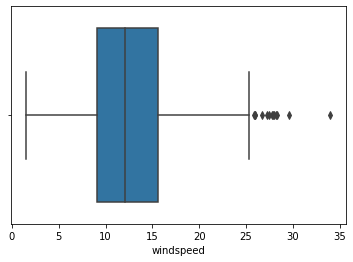

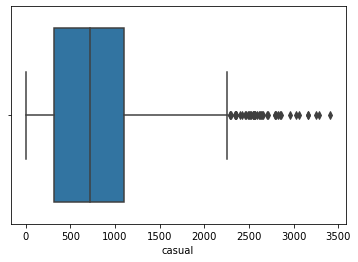

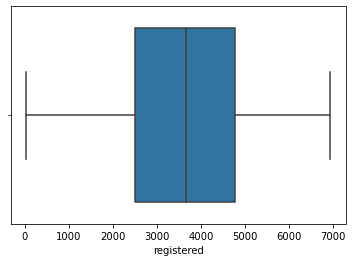

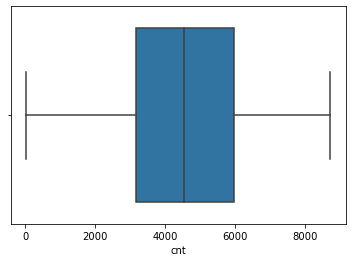

In [18]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()
#Lower Whisker= 25th percentile -1.5*(75th Percentile - 25th percentile)
#Upper Whisker= 75th percentile +1.5*(75th Percentile - 25th percentile)

### Categorical Columns

In [21]:
df["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

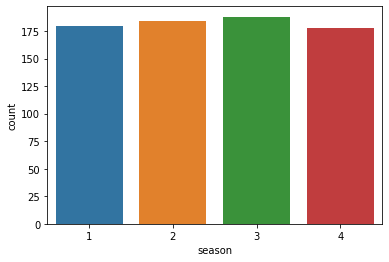

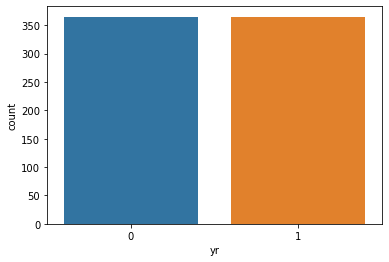

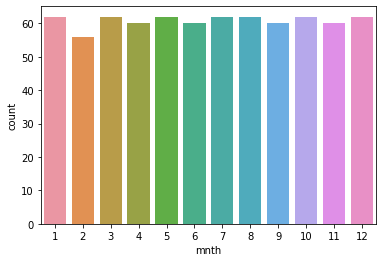

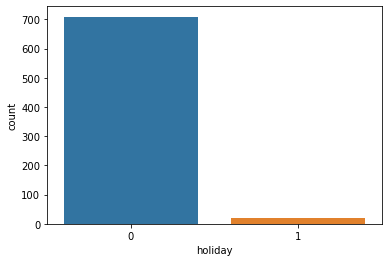

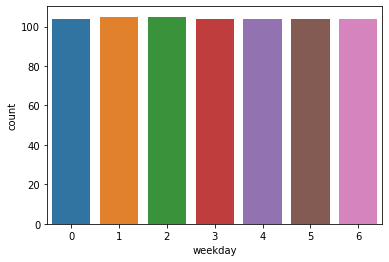

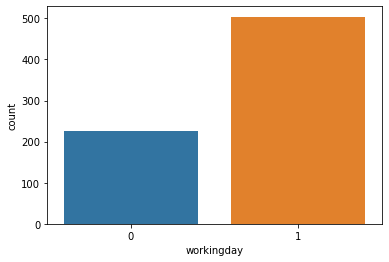

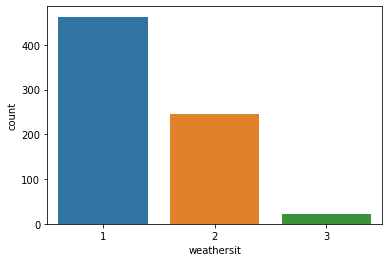

In [20]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

## Bivariate Analysis

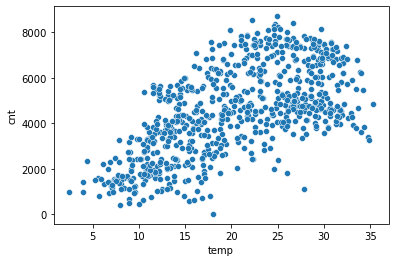

In [22]:
# Numerical Vs Numerical
sns.scatterplot(x=df["temp"],y=df["cnt"])
plt.show()

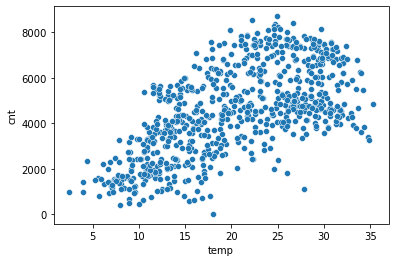

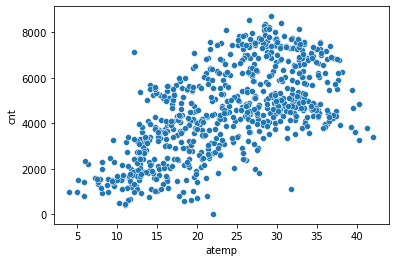

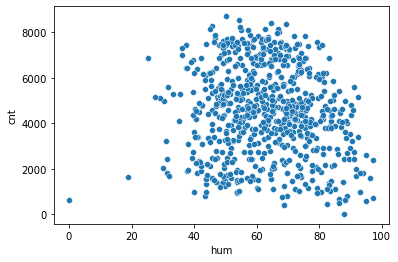

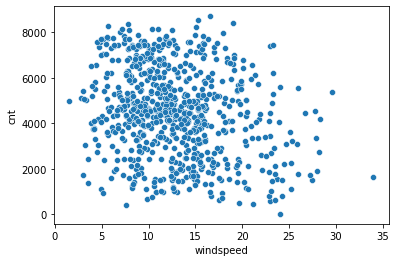

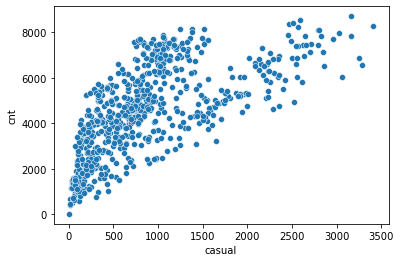

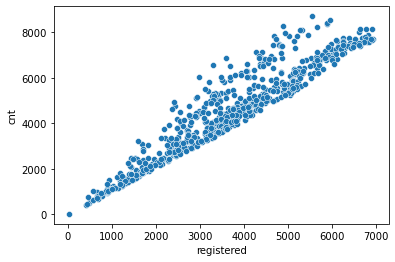

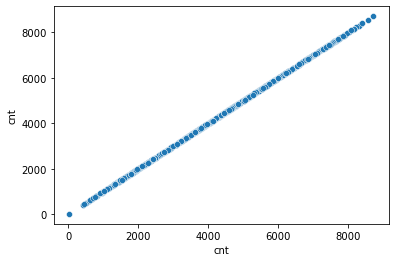

In [23]:
for i in num_cols:
    sns.scatterplot(x=df[i],y=df["cnt"])
    plt.show()

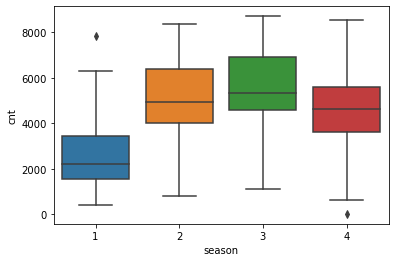

In [24]:
# Categorical Vs Numerical
sns.boxplot(x=df["season"],y=df["cnt"])
plt.show()

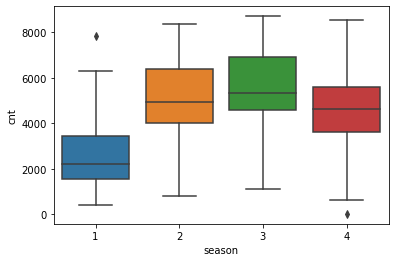

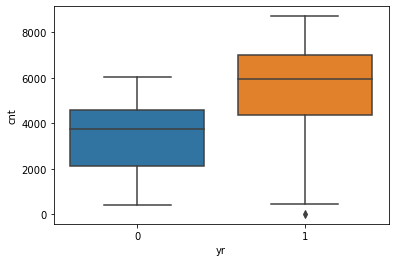

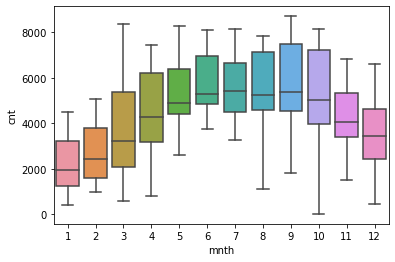

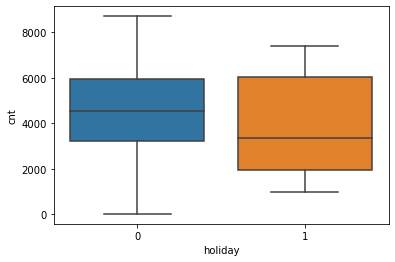

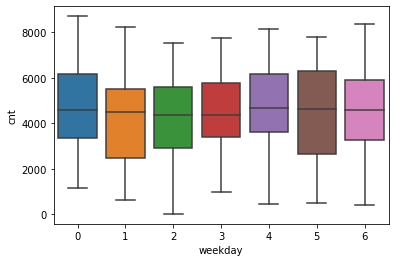

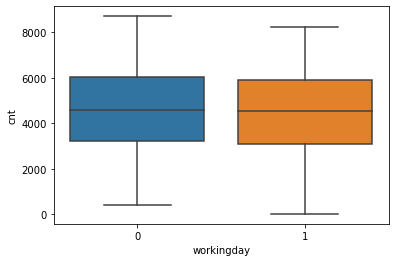

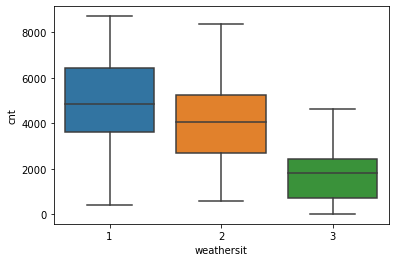

In [25]:
for i in cat_cols:
    sns.boxplot(x=df[i],y=df["cnt"])
    plt.show()

<AxesSubplot:xlabel='mnth', ylabel='temp'>

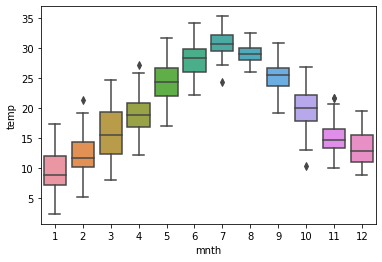

In [26]:
sns.boxplot(x=df["mnth"],y=df["temp"])

## Multivariate Analysis

In [27]:
# HeatMap (Numerical Columns)

In [28]:
## Correlation represents strength of relationship between variables
## Correlation lies in the range of -1 to 1
## Negative correlation  (0 to -1) shows inverse relationship
## Positive correlation (0 to 1) shows direct relationship
## 0 correlation represents no relationship.

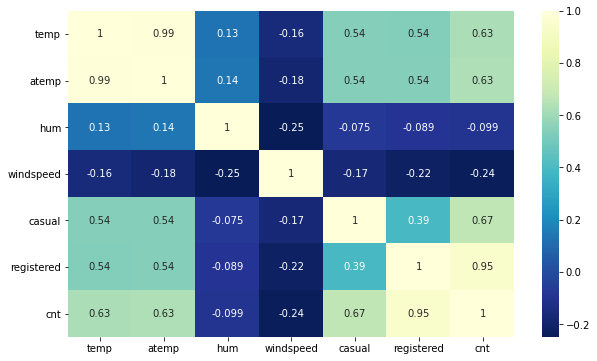

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(),annot=True,cmap="YlGnBu_r")
plt.show()

In [ ]:
!pip install seaborn --upgrade